# EDA project on **Telecommunication** Domain`

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'data/churn_dataset.csv'

df = pd.read_csv(path)

In [3]:
print(df.shape)
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [4]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
# Converting type of TotalCharges from Object type to Float type
df["TotalCharges"] = df["TotalCharges"].replace(' ',np.nan)
df["TotalCharges"] = df["TotalCharges"].replace('',np.nan)
df["TotalCharges"] = df["TotalCharges"].astype('float')

In [8]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
nan_counts = df["TotalCharges"].isna().sum()
print(nan_counts)

11


In [10]:
nan_data = df[df['TotalCharges'].isna()]
nan_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
print(df.shape)
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [12]:
print(df.shape)
# droping the rows having null values
df = df.dropna(subset=['TotalCharges'])
print(df.shape)

(7043, 21)
(7032, 21)


# Univariate Analysis on Various Columns

## Analysis on Numerical Data

In [13]:
#Non Viz analysis on column "SeniorCitizen"

min_SC = df["SeniorCitizen"].min()

max_SC = df["SeniorCitizen"].max()

mean_SC = df["SeniorCitizen"].mean()

med_SC = df["SeniorCitizen"].median()

std_SC = df["SeniorCitizen"].std()

count_SC = df['SeniorCitizen'].value_counts()

In [14]:
print("minimum no of Seniors Citizens :",min_SC)
print("maximum no of Seniors Citizens :",max_SC)
print("mean of Seniors Citizens Column :",mean_SC)
print("median no of Seniors Citizens Column :",med_SC)
print("Std of Seniors Citizens Column :",std_SC)

minimum no of Seniors Citizens : 0
maximum no of Seniors Citizens : 1
mean of Seniors Citizens Column : 0.16240045506257111
median no of Seniors Citizens Column : 0.0
Std of Seniors Citizens Column : 0.3688439967571208


In [15]:
print("count of Seniors Citizens :",count_SC)

count of Seniors Citizens : 0    5890
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:>

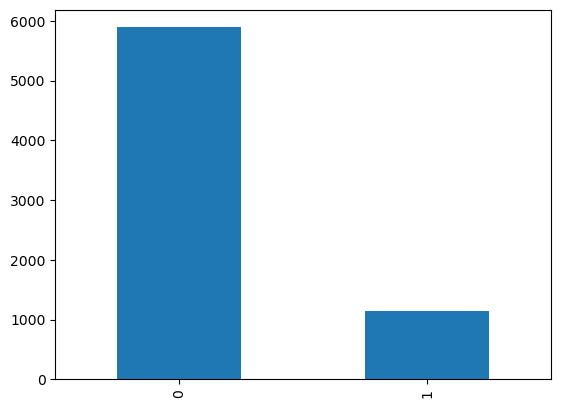

In [16]:
# Viz Analysis
# Bar plot
df['SeniorCitizen'].value_counts().plot(kind = 'bar')

#### Insight: Above plot shows the count of no of senior citizens present in each family

<AxesSubplot:ylabel='Density'>

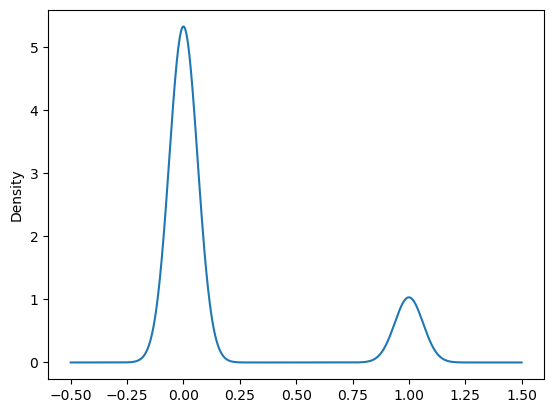

In [17]:
# Distribution plot

df['SeniorCitizen'].plot(kind = 'kde')

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.2458422933136138, 0.1624004550625711, 0.6662409924189413))

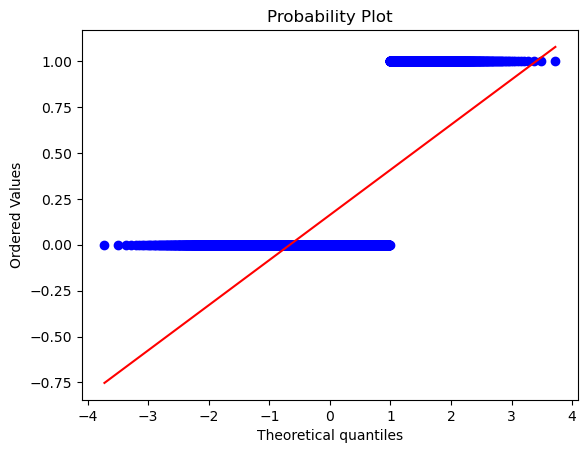

In [18]:
# Checking normality with QQ plot
stats.probplot(df['SeniorCitizen'],dist='norm',plot=plt)

In [19]:
#Non Viz analysis on column "SeniorCitizen"

min_tenure = df["tenure"].min()

max_tenure = df["tenure"].max()

mean_tenure = df["tenure"].mean()

med_tenure = df["tenure"].median()

std_tenure = df["tenure"].std()

count_tenure = df['tenure'].value_counts()

In [20]:
print("minimum of tenure :",min_tenure)
print("maximum of tenure :",max_tenure)
print("mean of tenure Column :",mean_tenure)
print("median no of tenure Column :",med_tenure)
print("Std of tenure Column :",std_tenure)


minimum of tenure : 1
maximum of tenure : 72
mean of tenure Column : 32.421786120591584
median no of tenure Column : 29.0
Std of tenure Column : 24.545259709263192


In [21]:
print("count of tenure :",count_tenure)

count of tenure : 1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64


<AxesSubplot:>

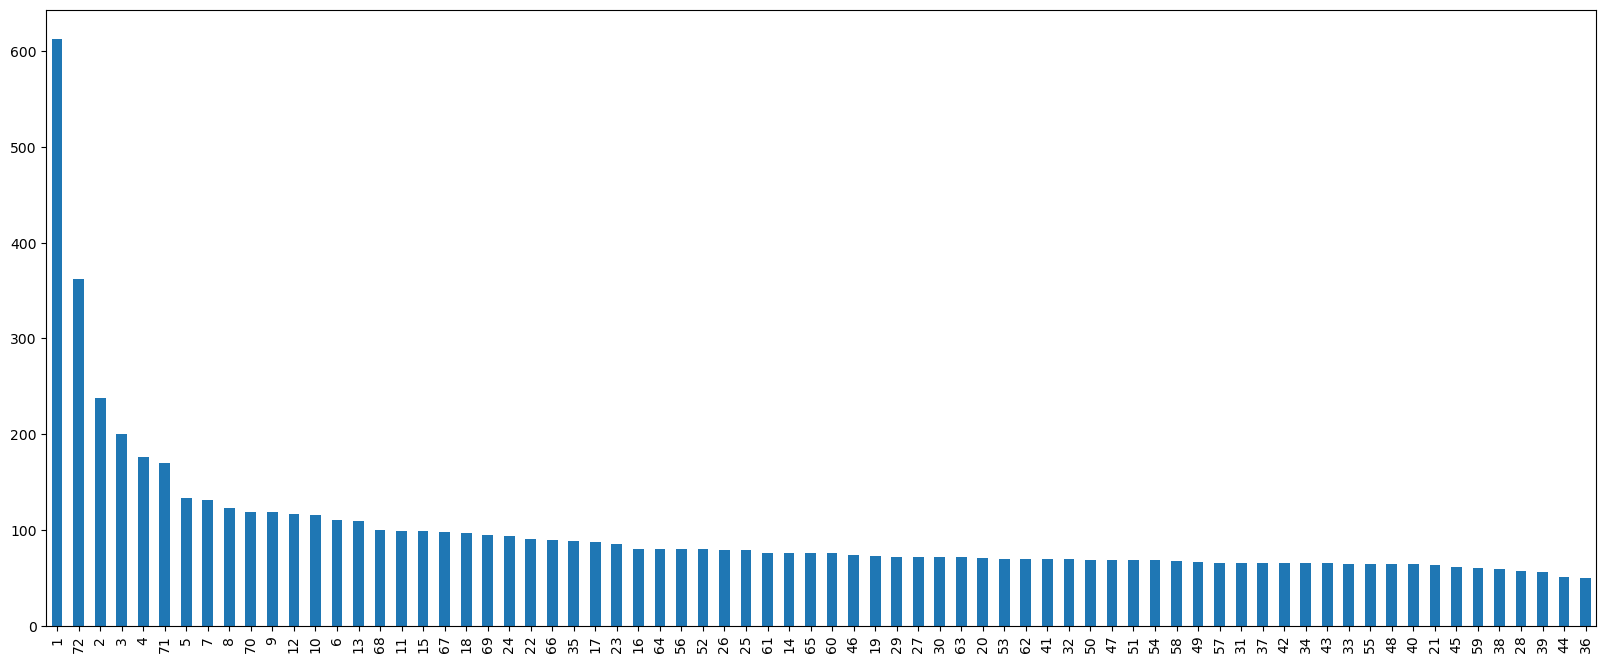

In [95]:
# Viz Analysis
# Bar plot
count_tenure.plot(kind = 'bar', figsize=(20, 8,))

<AxesSubplot:>

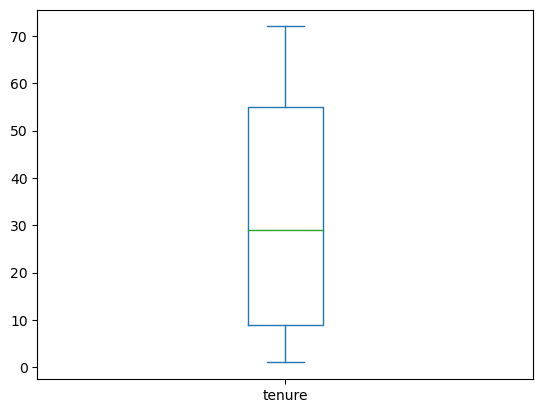

In [96]:
# Viz Analysis
# Box plot
df['tenure'].plot(kind = 'box')

#### Insight: Above plot shows the count of tenure

<AxesSubplot:ylabel='Density'>

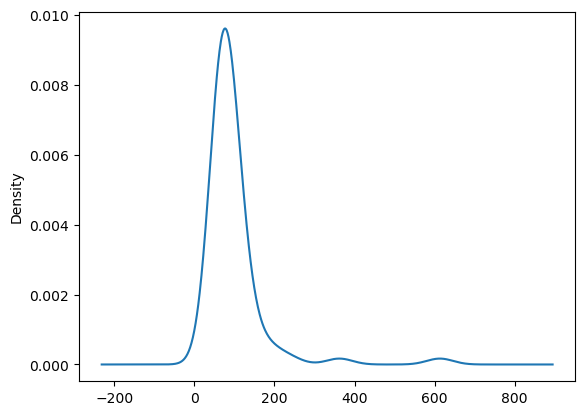

In [23]:
# Viz Analysis
# Bar plot
count_tenure.plot(kind = 'kde')

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([ 1,  1,  1, ..., 72, 72, 72], dtype=int64)),
 (23.349690724554222, 32.421786120591584, 0.950891514987785))

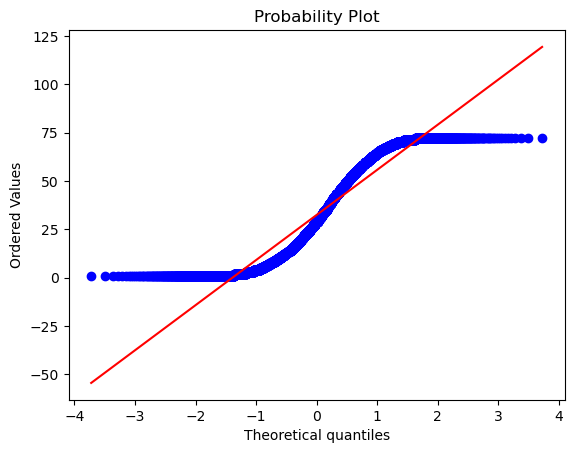

In [24]:
# Checking normality with QQ plot
stats.probplot(df['tenure'],dist='norm',plot=plt)

In [25]:
#Non Viz analysis on column "MonthlyCharges"

min_MC = df["MonthlyCharges"].min()

max_MC = df["MonthlyCharges"].max()

mean_MC = df["MonthlyCharges"].mean()

med_MC = df["MonthlyCharges"].median()

std_MC = df["MonthlyCharges"].std()

In [26]:
print("minimum Monthly Charges :",min_MC)
print("maximum of Monthly Charges :",max_MC)
print("mean of Monthly Charges Column :",mean_MC)
print("median of Monthly Charges Column :",med_MC)
print("Std of Monthly Charges Column :",std_MC)

minimum Monthly Charges : 18.25
maximum of Monthly Charges : 118.75
mean of Monthly Charges Column : 64.79820819112632
median of Monthly Charges Column : 70.35
Std of Monthly Charges Column : 30.08597388404983


<AxesSubplot:>

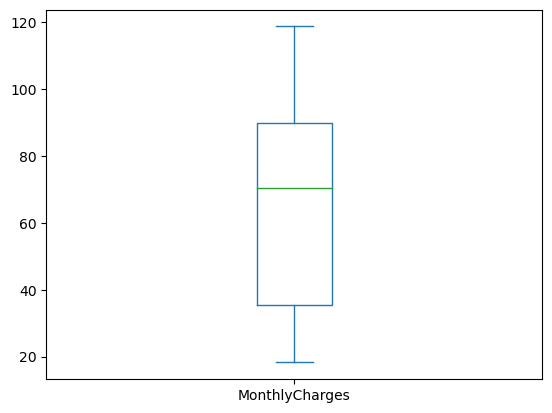

In [27]:
# Viz Analysis
# Box plot
df['MonthlyCharges'].plot(kind = 'box')

#### Insight: Above  box- plot shows the monthly charges spent . The mean of monthly charges is around 70/-

<AxesSubplot:ylabel='Density'>

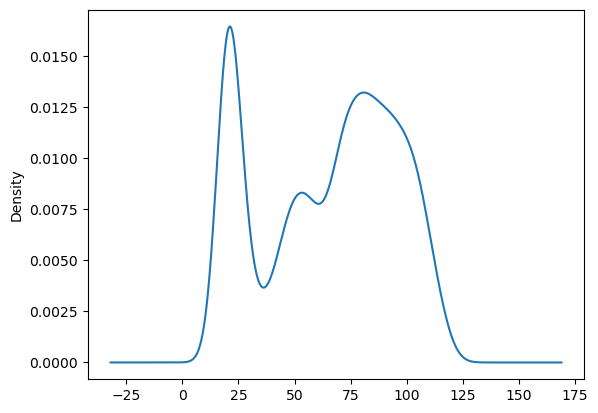

In [28]:
# Dist plot
df['MonthlyCharges'].plot(kind = 'kde')

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])),
 (28.8897945243159, 64.79820819112628, 0.9598378018813339))

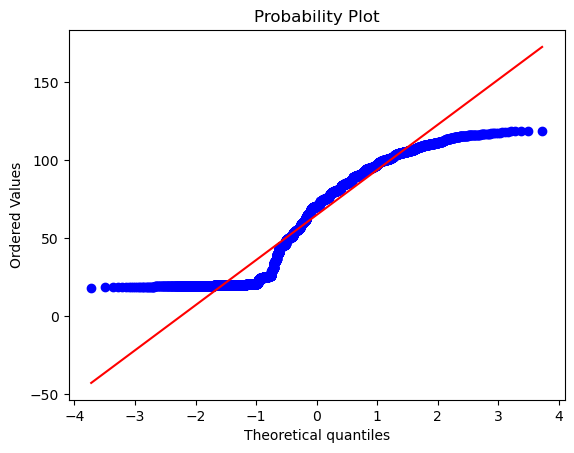

In [29]:
# Checking normality with QQ plot
stats.probplot(df['MonthlyCharges'],dist='norm',plot=plt)

In [30]:
#Non Viz analysis on column "TotalCharges"

min_TC = df["TotalCharges"].min()

max_TC = df["TotalCharges"].max()

mean_TC = df["TotalCharges"].mean()

med_TC = df["TotalCharges"].median()

std_TC = df["TotalCharges"].std()

In [31]:
print("minimum Total Charges :",min_TC)
print("maximum of Total Charges :",max_TC)
print("mean of Total Charges Column :",mean_TC)
print("median of Total Charges Column :",med_TC)
print("Std of Total Charges Column :",std_TC)

minimum Total Charges : 18.8
maximum of Total Charges : 8684.8
mean of Total Charges Column : 2283.3004408418697
median of Total Charges Column : 1397.475
Std of Total Charges Column : 2266.7713618831453


<AxesSubplot:>

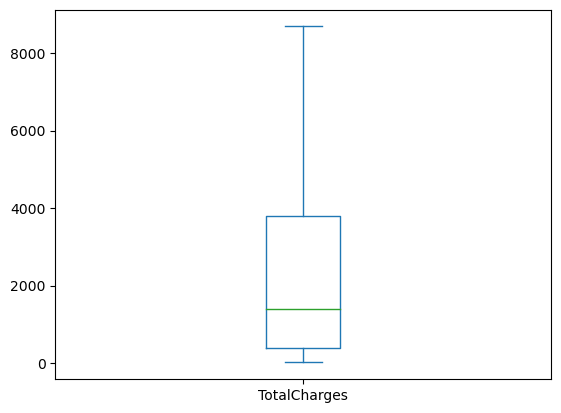

In [32]:
# Viz Analysis
# Box plot
df['TotalCharges'].plot(kind = 'box')

#### Insight: Above box-plot shows the total charges spent. The mean of is around 1400/-

<AxesSubplot:ylabel='Density'>

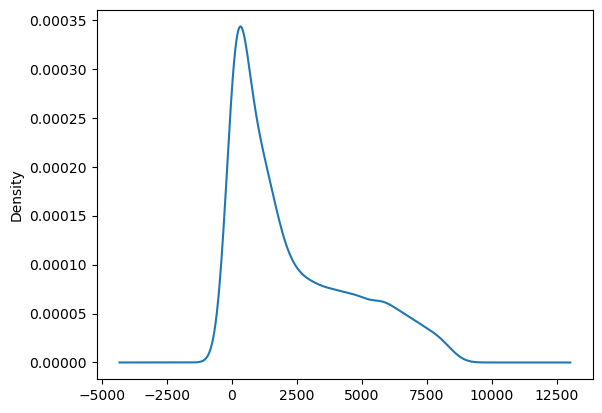

In [33]:
# Dist plot
df['TotalCharges'].plot(kind = 'kde')

((array([-3.72266485, -3.49251099, -3.36591532, ...,  3.36591532,
          3.49251099,  3.72266485]),
  array([  18.8 ,   18.85,   18.85, ..., 8670.1 , 8672.45, 8684.8 ])),
 (2103.8741055289356, 2283.300440841866, 0.9277468797916992))

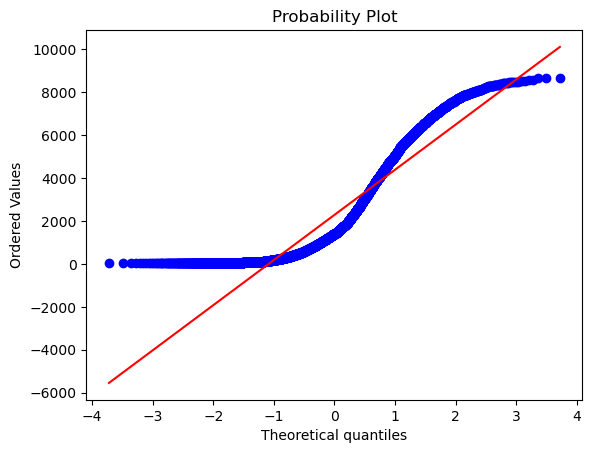

In [34]:
# Checking normality with QQ plot
stats.probplot(df['TotalCharges'],dist='norm',plot=plt)

## Analysis on Categorical Data

In [35]:
# Non viz on column 'sex'
gen_cnt = df['gender'].value_counts()
print(gen_cnt)

Male      3549
Female    3483
Name: gender, dtype: int64


<AxesSubplot:>

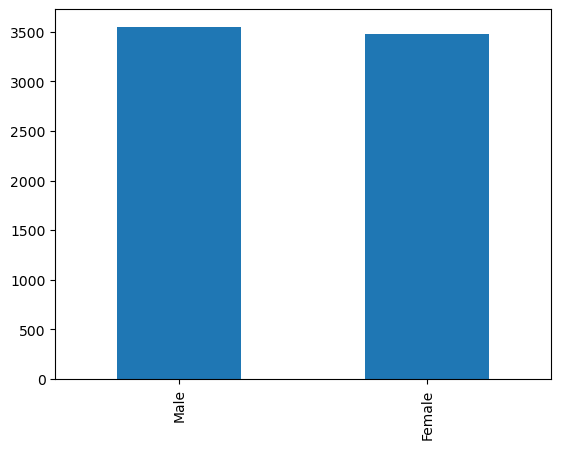

In [36]:
# viz analysis
# countplot on column 'gender'
df['gender'].value_counts().plot(kind = 'bar')

#### Insight: Above plot shows the count of male and female coustmers

In [37]:
# Non viz on column 'Partner'
par_cnt = df['Partner'].value_counts()
print(par_cnt)

No     3639
Yes    3393
Name: Partner, dtype: int64


<AxesSubplot:>

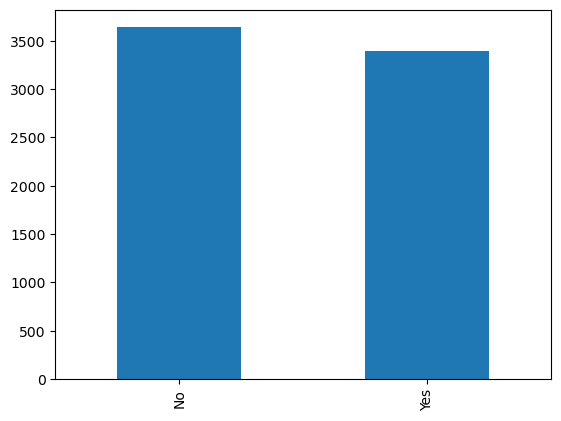

In [38]:
# viz analysis
# countplot on column 'Partner'
df['Partner'].value_counts().plot(kind = 'bar')

#### Insight: Above plot shows the count plot of column 'partner'

In [39]:
# Non viz on column 'Dependents'
Dependents_cnt = df['Dependents'].value_counts()
print(Dependents_cnt)

No     4933
Yes    2099
Name: Dependents, dtype: int64


<AxesSubplot:>

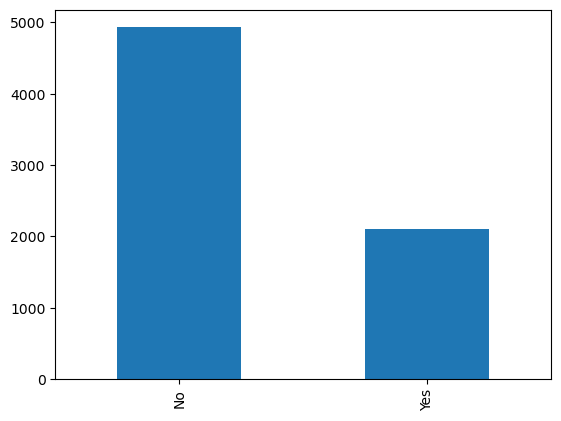

In [40]:
# viz analysis
# countplot on column 'Dependents'
df['Dependents'].value_counts().plot(kind = 'bar')

#### Insight: Above plot shows whether there are dependents or not

In [41]:
# Non viz on column 'PhoneService'
PhoneService_cnt = df['PhoneService'].value_counts()
print(PhoneService_cnt)

Yes    6352
No      680
Name: PhoneService, dtype: int64


<AxesSubplot:>

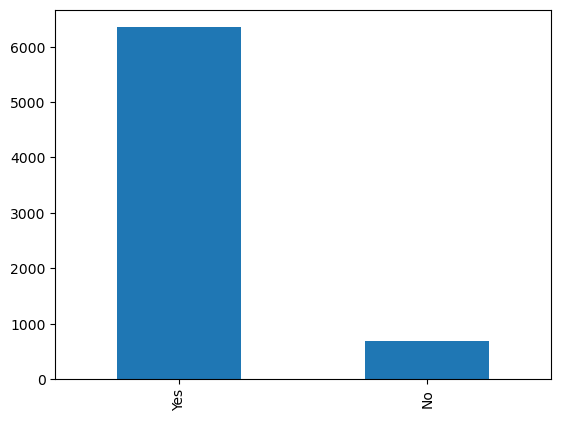

In [42]:
# viz analysis
# countplot on column 'PhoneService'
df['PhoneService'].value_counts().plot(kind = 'bar')

#### Insight: Above plot shows the whether there is phone service or not

In [43]:
# Non viz on column 'MultipleLines'
MulLns_cnt = df['MultipleLines'].value_counts()
print(MulLns_cnt)

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


<AxesSubplot:>

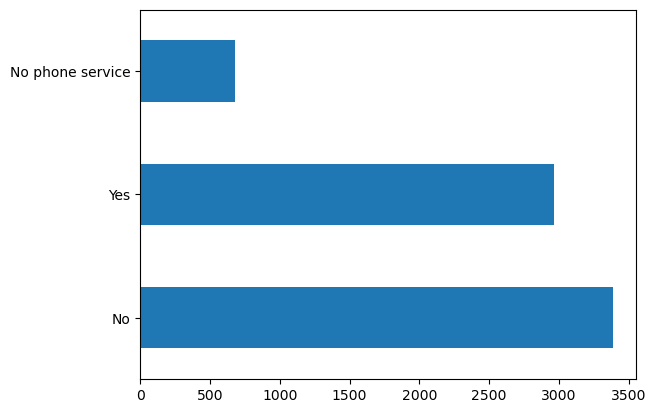

In [44]:
# viz analysis
# countplot on column 'MultipleLines'
df['MultipleLines'].value_counts().plot(kind = 'barh')

#### Insight: Above plot shows the representation of multiple lines

In [45]:
# Non viz on column 'InternetService'
IntrntSer_cnt = df['InternetService'].value_counts()
print(IntrntSer_cnt)

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


<AxesSubplot:>

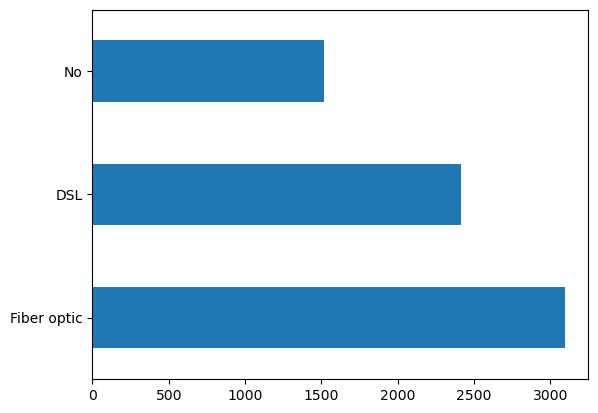

In [46]:
# viz analysis
# countplot on column 'InternetService'
df['InternetService'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represents the type of Internet service

In [47]:
# Non viz on column 'OnlineSecurity'
OnlSec_cnt = df['OnlineSecurity'].value_counts()
print(OnlSec_cnt)

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


<AxesSubplot:>

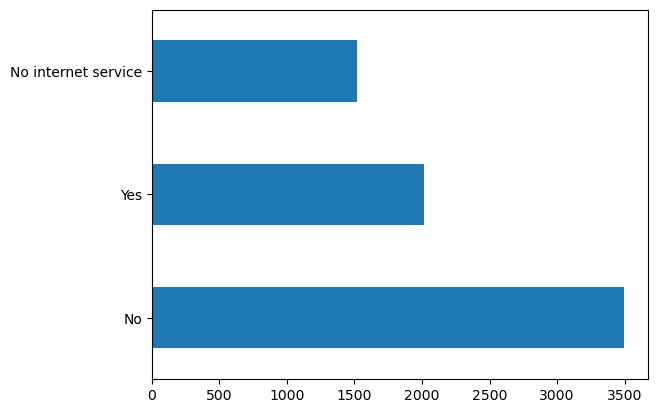

In [48]:
# viz analysis
# countplot on column 'OnlineSecurity'
df['OnlineSecurity'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts whether there is security or not

In [49]:
# Non viz on column 'OnlineBackup'
OnlBakup_cnt = df['OnlineBackup'].value_counts()
print(OnlBakup_cnt)

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


<AxesSubplot:>

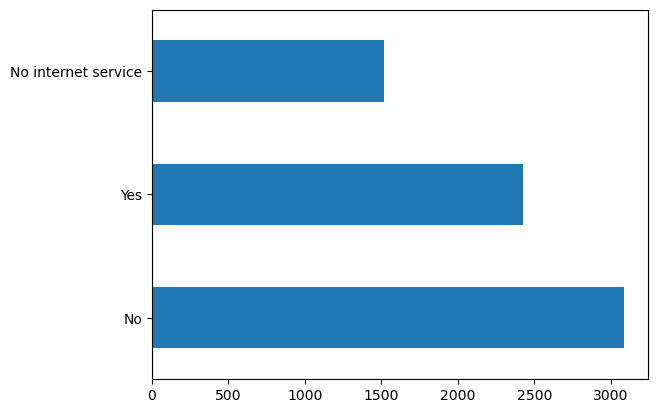

In [50]:
# viz analysis
# countplot on column 'OnlineBackup'
df['OnlineBackup'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts the whether there is online backup or not

In [51]:
# Non viz on column 'DeviceProtection'
DevPro_cnt = df['DeviceProtection'].value_counts()
print(DevPro_cnt)

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


<AxesSubplot:>

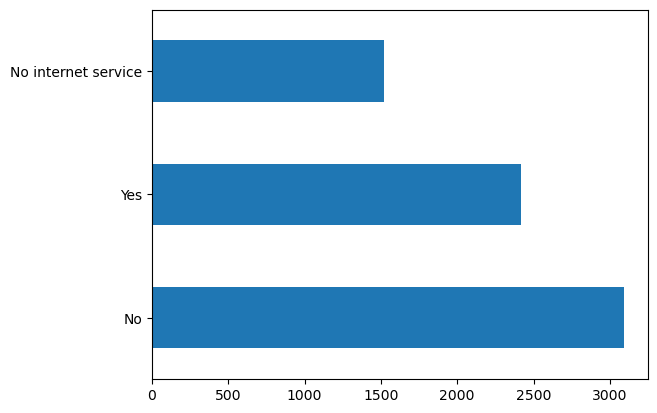

In [52]:
# viz analysis
# countplot on column 'DeviceProtection'
df['DeviceProtection'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts whether the device is protected or not

In [53]:
# Non viz on column 'TechSupport'
TecSup_cnt = df['TechSupport'].value_counts()
print(TecSup_cnt)

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


<AxesSubplot:>

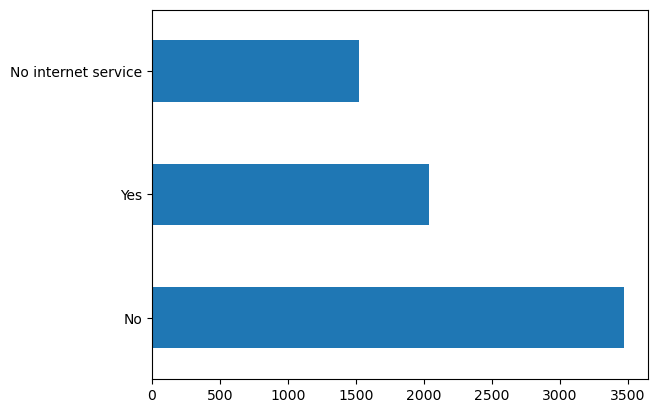

In [54]:
# viz analysis
# countplot on column 'TechSupport'
df['TechSupport'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts whether there is techinal assitantace and support or not

In [55]:
# Non viz on column 'StreamingTV'
StreTV_cnt = df['StreamingTV'].value_counts()
print(StreTV_cnt)

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


<AxesSubplot:>

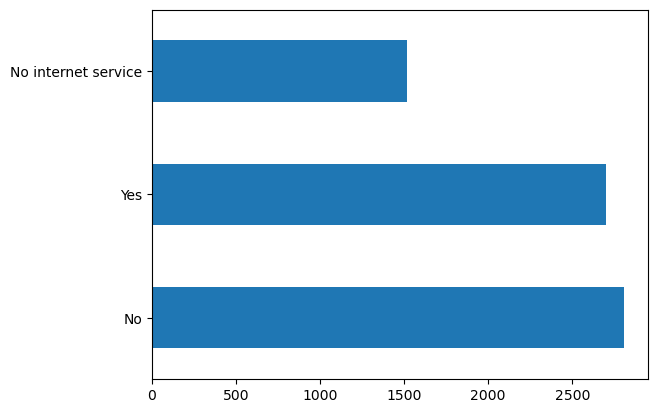

In [56]:
# viz analysis
# countplot on column 'StreamingTV'
df['StreamingTV'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts whether TV streaming is availble or not

In [57]:
# Non viz on column 'StreamingMovies'
StreMov_cnt = df['StreamingMovies'].value_counts()
print(StreMov_cnt)

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


<AxesSubplot:>

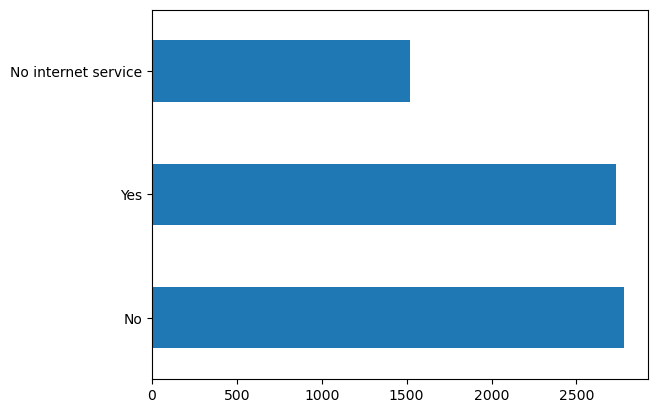

In [58]:
# viz analysis
# countplot on column 'StreamingMovies'
df['StreamingMovies'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts the whether Movies Streaming is provided or not 

In [59]:
# Non viz on column 'Contract'
Contract_cnt = df['Contract'].value_counts()
print(Contract_cnt)

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:>

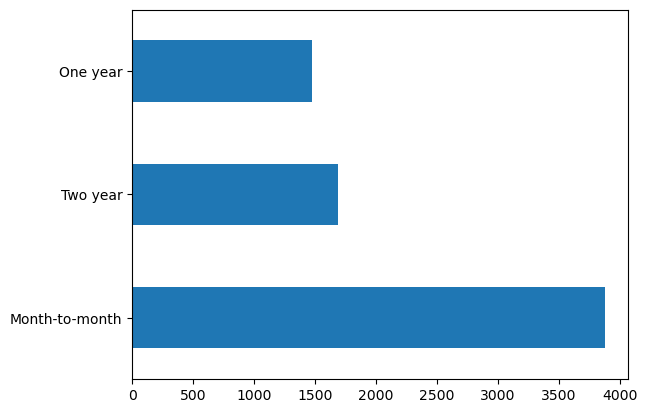

In [60]:
# viz analysis
# countplot on column 'Contract'
df['Contract'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts the type of subscription plan adopted.

In [61]:
# Non viz on column 'PaperlessBilling'
PprBill_cnt = df['PaperlessBilling'].value_counts()
print(PprBill_cnt)

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


<AxesSubplot:>

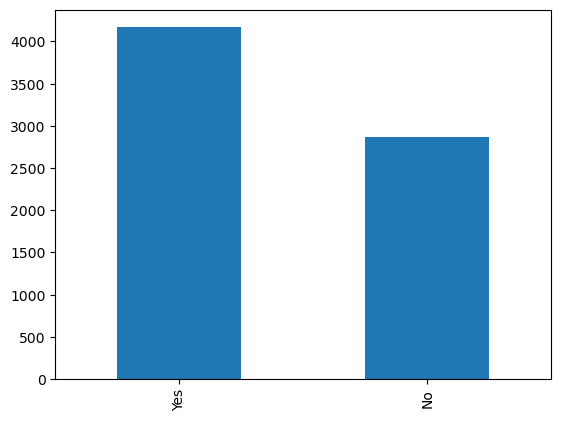

In [62]:
# viz analysis
# countplot on column 'PaperlessBilling'
df['PaperlessBilling'].value_counts().plot(kind = 'bar')

#### Insight: Above plot represnts the type of biling

In [63]:
# Non viz on column 'PaymentMethod'
PymtMet_cnt = df['PaymentMethod'].value_counts()
print(PymtMet_cnt)

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


<AxesSubplot:>

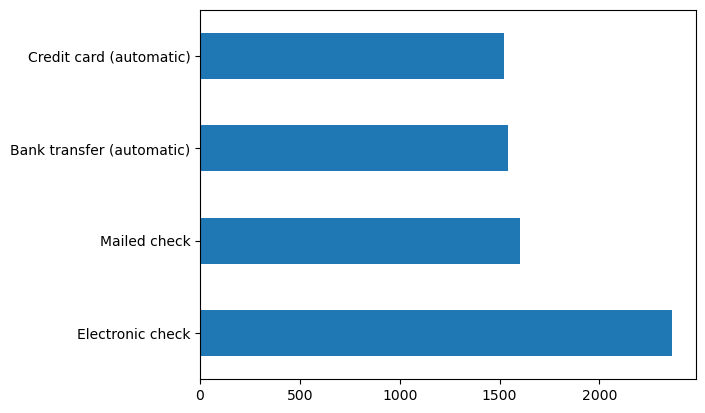

In [64]:
# viz analysis
# countplot on column 'PaymentMethod'
df['PaymentMethod'].value_counts().plot(kind = 'barh')

#### Insight: Above plot represnts the type of payment followed by coustmers

In [65]:
# Non viz on column 'Churn'
Churn_cnt = df['Churn'].value_counts()
print(Churn_cnt)

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:>

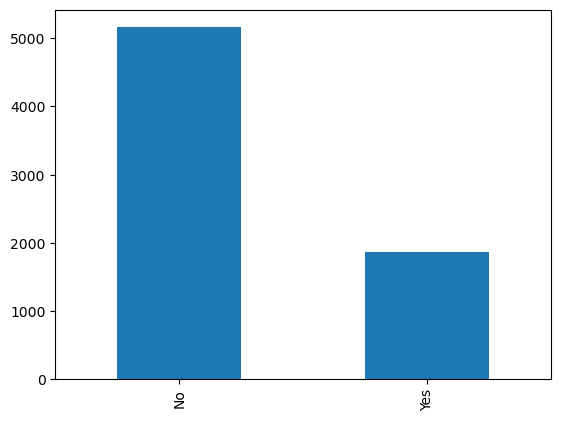

In [92]:
# viz analysis
# countplot on column 'Churn'
df['Churn'].value_counts().plot(kind = 'bar')


<AxesSubplot:ylabel='Churn'>

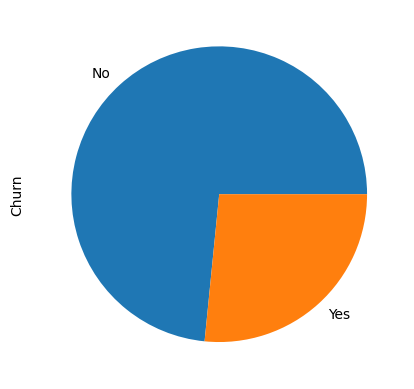

In [93]:

df['Churn'].value_counts().plot(kind = 'pie')

#### Insight: Above plot represnts the churn of the coustmers

In [67]:
columns = df.columns
[columns]

[Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object')]

In [68]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [69]:
def bi_viz(column):
    if df[column].dtype == object:
        pd.crosstab(df[column], df["Churn"]).plot(kind="bar", stacked=True, rot=30, xlabel=column, ylabel='Count')
        plt.show()
    else:
        sns.boxplot(x=df["Churn"], y=df[column])
        plt.show()


In [70]:
def bi_viz(column):
    if df[column].dtype == object:
        pd.crosstab( df["Churn"],df[column]).plot(kind="bar", stacked=True)
        plt.xticks(rotation=0)  # Rotate x-axis tick labels by 90 degrees
        plt.show()
    else:
        sns.boxplot(df[column], df["Churn"])
        plt.show()


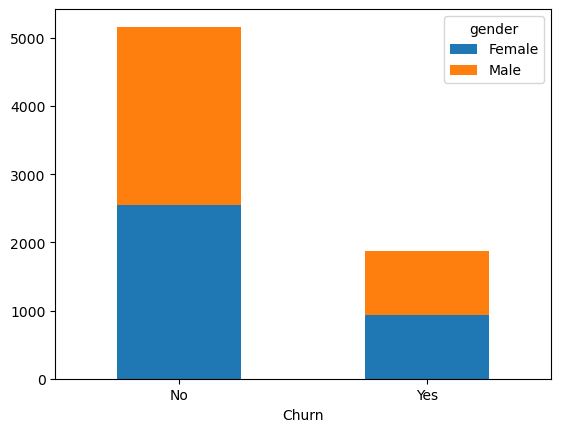

In [71]:
# Bi-variate analysis on "gender" vs "Churn".
bi_viz('gender')

#### Insights : 
#### The Bi-variate graph plotted for gender vs churn is a stacked bar graph. 
#### There is no proper relation betwwen the columns.

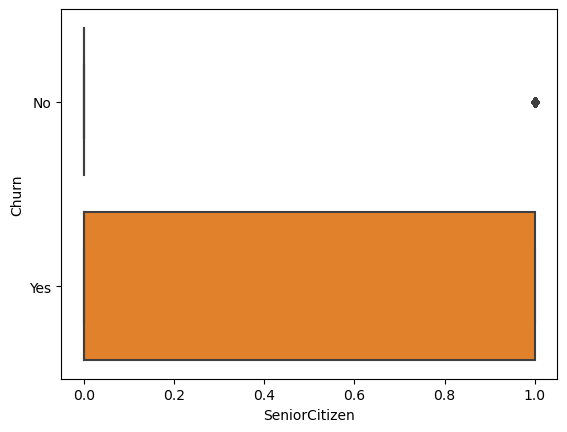

In [72]:
# Bi-variate analysis on "SeniorCitizen" vs "Churn".
bi_viz('SeniorCitizen')

#### Insights : 
#### The Bi-variate graph plotted for Senior Citizen vs churn is a box-plot. 
#### There is no proper relation between these columns.

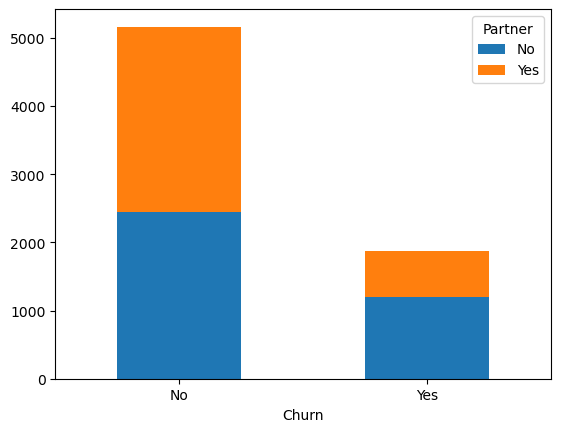

In [73]:
# Bi-variate analysis on "Partner" vs "Churn".
bi_viz('Partner')

### Insights : 
#### The Bi-variate graph plotted for partner vs churn is a stacked bar graph. 
#### People who are having no partners are likly to churn more.
### Recomendations:
#### To keep the coustmers churn free providing some offers for singles might help firm.

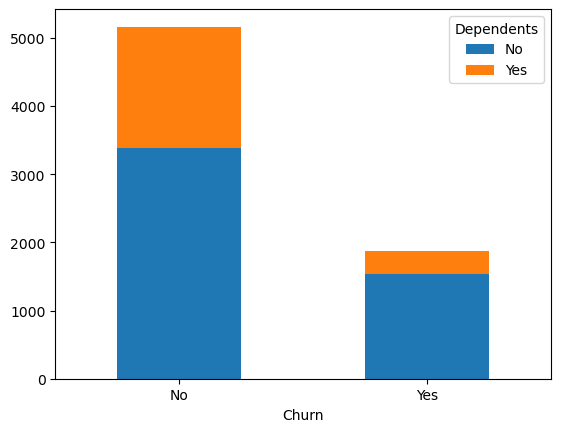

In [74]:
# Bi-variate analysis on "Dependents" vs "Churn".
bi_viz('Dependents')

### Insights : 
#### The Bi-variate graph plotted for dependents vs churn is a stacked bar graph. 
#### People who are having no dependents are likly to churn more compartively.
### Recomendations:
#### To keep the coustmers churn free providing some offers for singles might help firm.

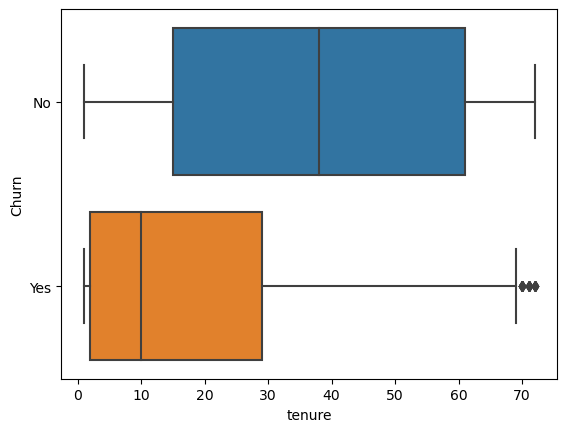

In [75]:
# Bi-variate analysis on "tenure" vs "Churn".
bi_viz('tenure')

### Insights : 
#### The Bi-variate graph plotted for tenure vs churn is a box-plot graph. 
#### People who are having less tenure are likly to churn more.

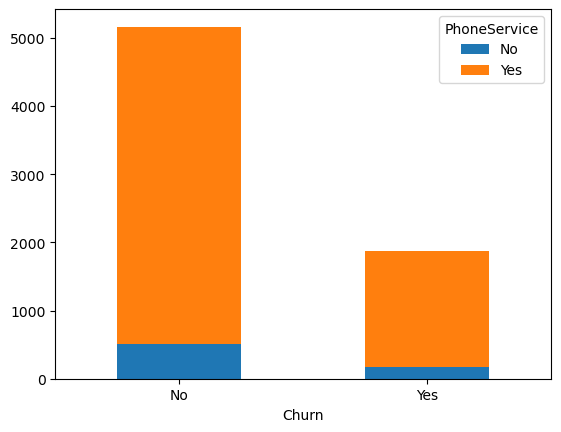

In [76]:
# Bi-variate analysis on "PhoneService" vs "Churn".
bi_viz('PhoneService')

### Insights : 
#### The Bi-variate graph plotted for phoneservice vs churn is a stacked bar graph. 
#### No proper relation is found

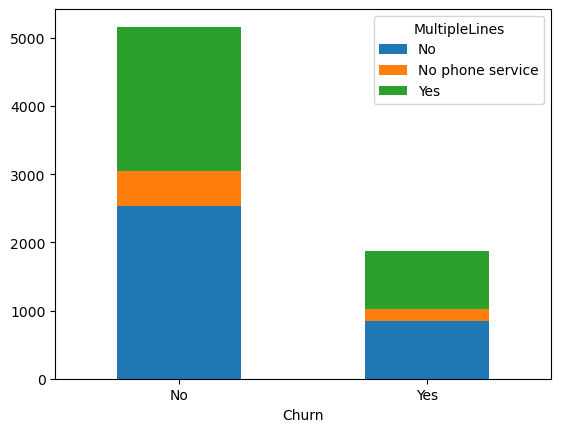

In [77]:
# Bi-variate analysis on "MultipleLines" vs "Churn".
bi_viz('MultipleLines')

### Insights : 
#### The Bi-variate graph plotted for multiple lines vs churn is a stacked bar graph. 
#### No proper relation is found

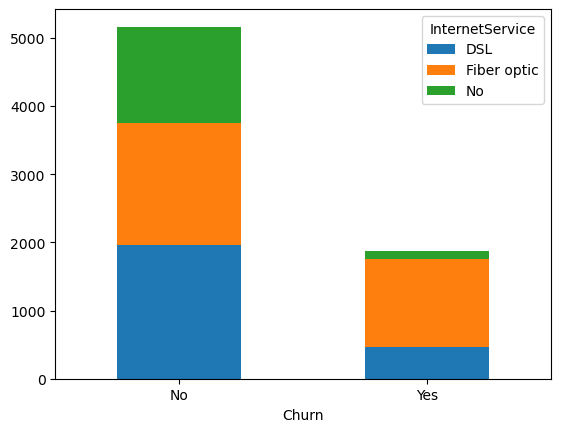

In [78]:
# Bi-variate analysis on "InternetService" vs "Churn".
bi_viz('InternetService')

### Insights : 
#### The Bi-variate graph plotted for Internetservice vs churn is a stacked bar graph. 
#### People with fiber optic are likely to churn

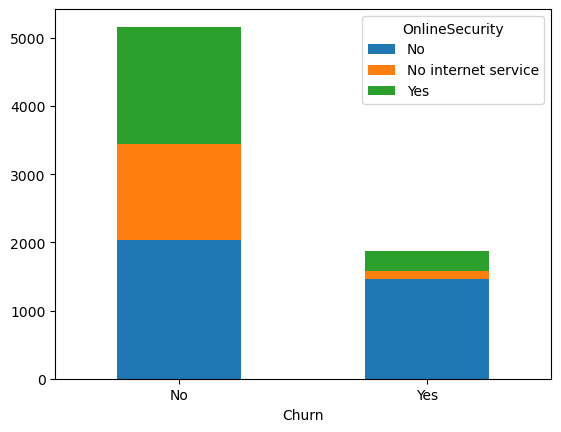

In [79]:
# Bi-variate analysis on "OnlineSecurity" vs "Churn".
bi_viz('OnlineSecurity')

### Insights : 
#### The Bi-variate graph plotted for online security vs churn is a stacked bar graph. 
#### People with no online security are likely to churn
### Recomendations:
#### Providing online security at cheaper rates and analysing the other aspects.

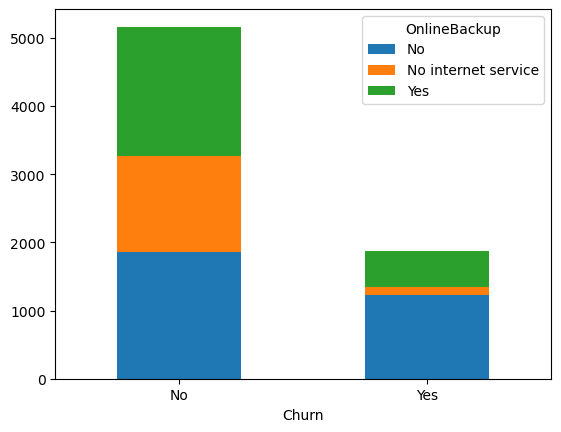

In [80]:
# Bi-variate analysis on "OnlineBackup" vs "Churn".
bi_viz('OnlineBackup')

### Insights : 
#### The Bi-variate graph plotted for online backup vs churn is a stacked bar graph. 
#### People with no online backup are likely to churn
### Recomendations:
#### Providing online backup at cheaper rates and analysing the other aspects.

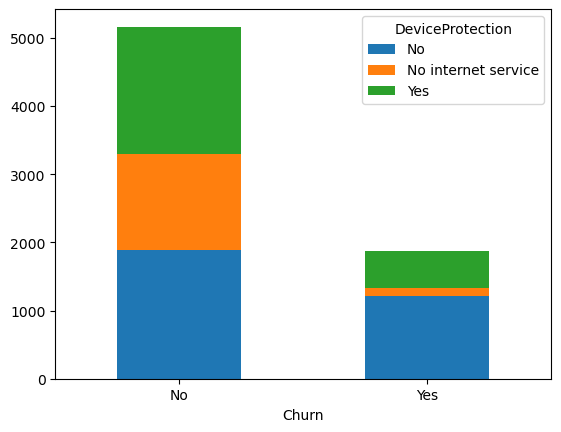

In [81]:
# Bi-variate analysis on "DeviceProtection" vs "Churn".
bi_viz('DeviceProtection')

### Insights : 
#### The Bi-variate graph plotted for Device Protection vs churn is a stacked bar graph. 
#### People with no online security are likely to churn
### Recomendations:
#### Providing techinal assitance and support for coustmers.

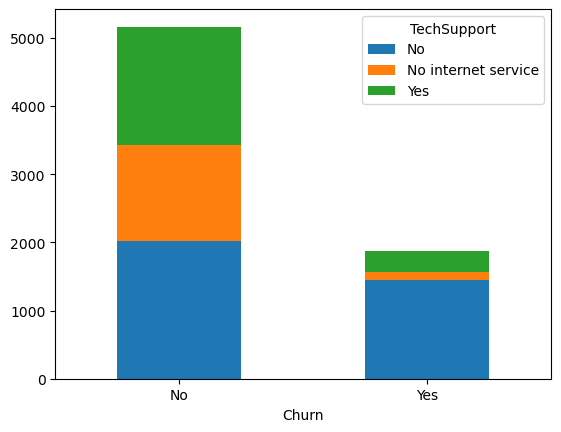

In [82]:
# Bi-variate analysis on "TechSupport" vs "Churn".
bi_viz('TechSupport')

### Insights : 
#### The Bi-variate graph plotted for Tech support vs churn is a stacked bar graph. 
#### People with no online security are likely to churn
### Recomendations:
#### Providing techinal assitance and support for coustmers.

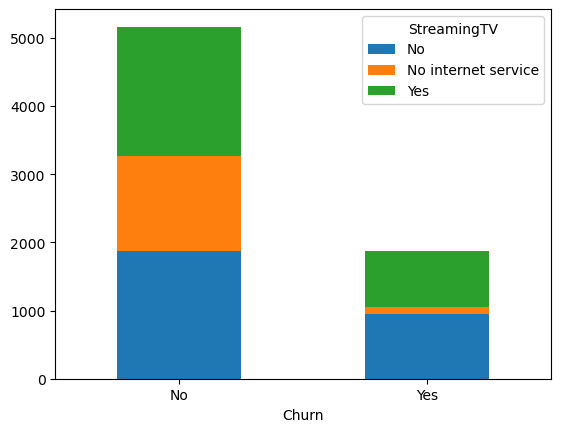

In [83]:
# Bi-variate analysis on "StreamingTV" vs "Churn".
bi_viz('StreamingTV')

### Insights : 
#### The Bi-variate graph plotted for StreamingTV vs churn is a stacked bar graph. 
#### No proper relation found

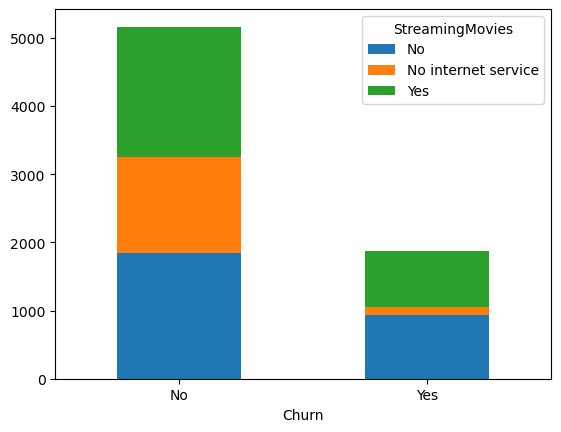

In [84]:
# Bi-variate analysis on "StreamingMovies" vs "Churn".
bi_viz('StreamingMovies')

### Insights : 
#### The Bi-variate graph plotted for Streaming movies vs churn is a stacked bar graph. 
#### No proper relation found

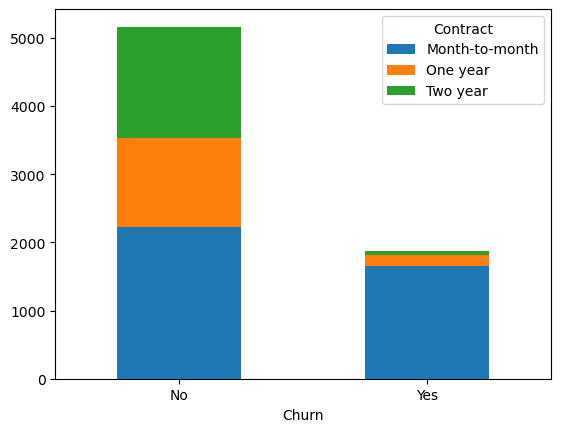

In [85]:
# Bi-variate analysis on "Contract" vs "Churn".
bi_viz('Contract')

### Insights : 
#### The Bi-variate graph plotted for type of contract vs churn is a stacked bar graph. 
#### coustmers opting month to month contract seems to be churn.
### Recommendations:
#### Recommending consumers to opt other plans.

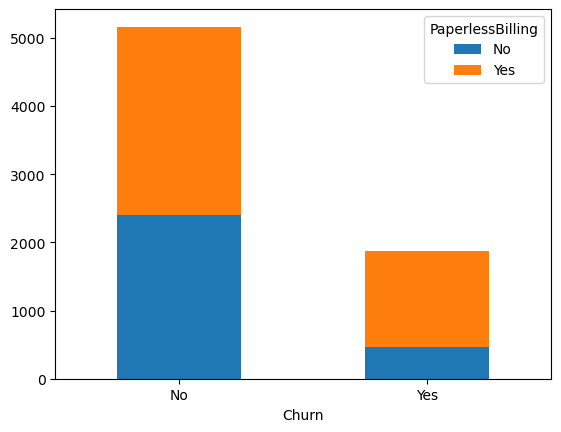

In [86]:
# Bi-variate analysis on "PaperlessBilling" vs "Churn".
bi_viz('PaperlessBilling')

### Insights : 
#### The Bi-variate graph plotted for paperless billing vs churn is a stacked bar graph. 
#### coustmers with paperless billing seems to be churn more compartively.
### Recommendations:
#### Creating a proper awareness regarding the scenario behind the generation of paperless billing.
#### Giving a clear explaination of bills with the support of coustmer care staff.

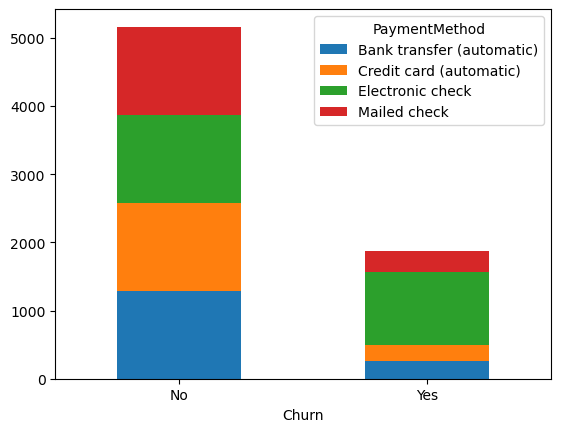

In [87]:
# Bi-variate analysis on "PaymentMethod" vs "Churn".
bi_viz('PaymentMethod')

### Insights : 
#### The Bi-variate graph plotted for payment method vs churn is a stacked bar graph. 
#### coustmers paying via electronic seems to be churn more compartively.
### Recommendations:
#### finding the actual reason behind the churn of this category and provding few more benefits extending the payment for few more days
#### taking considerations from the consumers with the support of coustmer care staff.

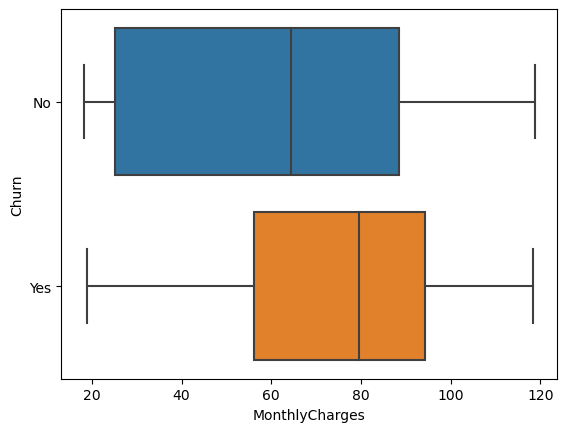

In [88]:
# Bi-variate analysis on "MonthlyCharges" vs "Churn".
bi_viz('MonthlyCharges')

### Insights : 
#### The Bi-variate graph plotted for monthly charges vs churn is a box bar graph. 
#### coustmers paying high monthly charges seems to be churn.
### Recommendations:
#### Providing offers such as combos etc.. might help to reduce churn.
#### Recommending consumers to opt other plans.

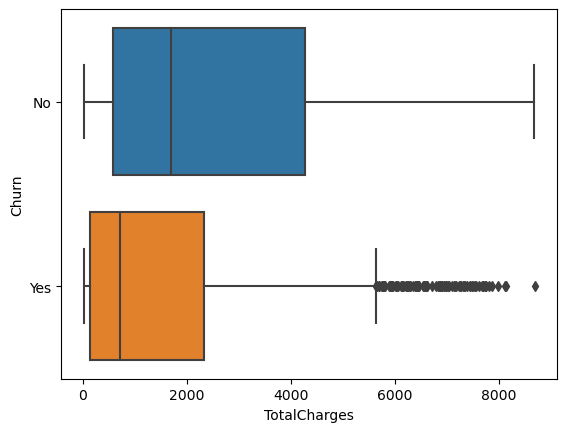

In [89]:
# Bi-variate analysis on "TotalCharges" vs "Churn".
bi_viz('TotalCharges')

### Insights : 
#### The Bi-variate graph plotted for total charges vs churn is a box bar graph. 

### Recommendations:
#### Providing offers or introducing new plans that include combos  offers etc.. might help to reduce churn.
